In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys, os
from glob import glob
import imageio

In [2]:
!ls data_food/train/food

1_0.jpg    1_1191.jpg 1_1385.jpg 1_229.jpg  1_422.jpg  1_616.jpg  1_81.jpg
1_1.jpg    1_1192.jpg 1_1386.jpg 1_23.jpg   1_423.jpg  1_617.jpg  1_810.jpg
1_10.jpg   1_1193.jpg 1_1387.jpg 1_230.jpg  1_424.jpg  1_618.jpg  1_811.jpg
1_100.jpg  1_1194.jpg 1_1388.jpg 1_231.jpg  1_425.jpg  1_619.jpg  1_812.jpg
1_1000.jpg 1_1195.jpg 1_1389.jpg 1_232.jpg  1_426.jpg  1_62.jpg   1_813.jpg
1_1001.jpg 1_1196.jpg 1_139.jpg  1_233.jpg  1_427.jpg  1_620.jpg  1_814.jpg
1_1002.jpg 1_1197.jpg 1_1390.jpg 1_234.jpg  1_428.jpg  1_621.jpg  1_815.jpg
1_1003.jpg 1_1198.jpg 1_1391.jpg 1_235.jpg  1_429.jpg  1_622.jpg  1_816.jpg
1_1004.jpg 1_1199.jpg 1_1392.jpg 1_236.jpg  1_43.jpg   1_623.jpg  1_817.jpg
1_1005.jpg 1_12.jpg   1_1393.jpg 1_237.jpg  1_430.jpg  1_624.jpg  1_818.jpg
1_1006.jpg 1_120.jpg  1_1394.jpg 1_238.jpg  1_431.jpg  1_625.jpg  1_819.jpg
1_1007.jpg 1_1200.jpg 1_1395.jpg 1_239.jpg  1_432.jpg  1_626.jpg  1_82.jpg
1_1008.jpg 1_1201.jpg 1_1396.jpg 1_24.jpg   1_433.jpg  1_627.jpg  1_820.jpg
1_1009.jpg 1_1

In [3]:
!ls data_food/train/nonfood/

0_0.jpg    0_1191.jpg 0_1385.jpg 0_229.jpg  0_422.jpg  0_616.jpg  0_81.jpg
0_1.jpg    0_1192.jpg 0_1386.jpg 0_23.jpg   0_423.jpg  0_617.jpg  0_810.jpg
0_10.jpg   0_1193.jpg 0_1387.jpg 0_230.jpg  0_424.jpg  0_618.jpg  0_811.jpg
0_100.jpg  0_1194.jpg 0_1388.jpg 0_231.jpg  0_425.jpg  0_619.jpg  0_812.jpg
0_1000.jpg 0_1195.jpg 0_1389.jpg 0_232.jpg  0_426.jpg  0_62.jpg   0_813.jpg
0_1001.jpg 0_1196.jpg 0_139.jpg  0_233.jpg  0_427.jpg  0_620.jpg  0_814.jpg
0_1002.jpg 0_1197.jpg 0_1390.jpg 0_234.jpg  0_428.jpg  0_621.jpg  0_815.jpg
0_1003.jpg 0_1198.jpg 0_1391.jpg 0_235.jpg  0_429.jpg  0_622.jpg  0_816.jpg
0_1004.jpg 0_1199.jpg 0_1392.jpg 0_236.jpg  0_43.jpg   0_623.jpg  0_817.jpg
0_1005.jpg 0_12.jpg   0_1393.jpg 0_237.jpg  0_430.jpg  0_624.jpg  0_818.jpg
0_1006.jpg 0_120.jpg  0_1394.jpg 0_238.jpg  0_431.jpg  0_625.jpg  0_819.jpg
0_1007.jpg 0_1200.jpg 0_1395.jpg 0_239.jpg  0_432.jpg  0_626.jpg  0_82.jpg
0_1008.jpg 0_1201.jpg 0_1396.jpg 0_24.jpg   0_433.jpg  0_627.jpg  0_820.jpg
0_1009.jpg 0_1

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_2165/3698288851.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('data_food/train/nonfood/0_808.jpg'))


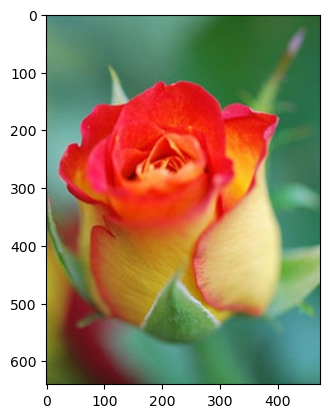

In [4]:
plt.imshow(imageio.imread('data_food/train/nonfood/0_808.jpg'))

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_2165/833163210.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('data_food/train/food/1_1180.jpg'))


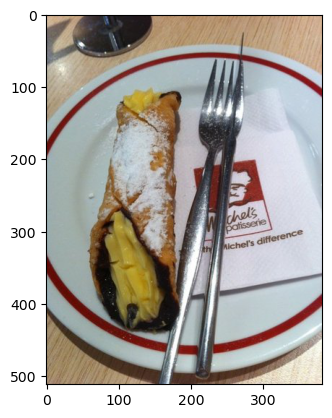

In [5]:
#Food images start with 1, nonfood start with 0
plt.imshow(imageio.imread('data_food/train/food/1_1180.jpg'))

In [6]:
#note: normalize mean and std are standarized for ImageNet
transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
        
])

In [7]:
#create train and test dataset
class CustomImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != '.ipynb_checkpoints']
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

train_dataset = CustomImageFolder(
    'data_food/train',
    transform=transform
)
test_dataset = CustomImageFolder(
    'data_food/test',
    transform=transform
)

In [8]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size= batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [9]:
#Define the pretrained model
vgg = models.vgg16(pretrained = True)

/Users/mikkychilaka/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mikkychilaka/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
class VGGFeatures(nn.Module):
    def __init__(self, vgg):
        super(VGGFeatures,self).__init__()
        self.vgg = vgg
    def forward(self, X):
        out = vgg.features(X)
        out = vgg.avgpool(out)
        out = out.view(out.size(0), -1) #flatten
        return out

In [12]:
vggf = VGGFeatures(vgg)
print(vggf)

VGGFeatures(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16)

In [13]:
out = vggf(torch.rand(1,3,224,224))
out.shape

torch.Size([1, 25088])

In [14]:
#Transform the data
Ntrain = len(train_dataset)
Ntest = len(test_dataset)
Ntrain, Ntest

(3003, 1000)

In [15]:
#Dimensionality
D = out.shape[1]

In [16]:
X_train = np.zeros((Ntrain, D))
y_train = np.zeros((Ntrain, 1))
X_test = np.zeros((Ntest, D))
y_test = np.zeros((Ntest, 1))

In [17]:
len(train_dataset)

3003

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)
vggf.to(device)

cpu


VGGFeatures(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16)

In [19]:
#Populate X_train and y_train
i = 0
with torch.no_grad():
    for inputs, targets in train_loader:
        #move data to cpu
        inputs= inputs.to(device)
        #get output
        output = vggf(inputs)
        #size of the batch (may not alwyas be batch_size)
        sz = len(output)
        #assign to X_train and y_train
        X_train[i:i + sz] = output.cpu().detach().numpy()
        y_train[i:i + sz] = targets.view(-1,1).numpy()

        #increment i
        i += sz
        print(i)

128
256
384
512


OSError: image file is truncated (3 bytes not processed)

In [20]:
len(output)

128

In [21]:
#Populate X_train and y_train
i = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        #move data to cpu
        inputs= inputs.to(device)
        #get output
        output = vggf(inputs)
        #size of the batch (may not alwyas be batch_size)
        sz = len(output)
        #assign to X_train and y_train
        X_train[i:i + sz] = output.cpu().detach().numpy()
        y_train[i:i + sz] = targets.view(-1,1).numpy()

        #increment i
        i += sz
        print(i)

128
256
384
512
640
768
896
1000


In [22]:
X_train.max(), X_train.min()

(78.93634796142578, 0.0)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

#Try the built-in logistic regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2, y_train.flatten())
print("train score:", logr.score(X_train2, y_train.flatten()))
print("test score:", logr.score(X_test2, y_test.flatten()))

train score: 1.0
test score: 1.0


In [24]:
#D0 logistic regression in Pytorch
model = nn.Linear(D, 1)

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Linear(in_features=25088, out_features=1, bias=True)

In [26]:
#loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [27]:
#Make datasets
train_dataset2 = torch.utils.data.TensorDataset(
    torch.from_numpy(X_train2.astype(np.float32)),
    torch.from_numpy(y_train.astype(np.float32)),
)
test_dataset2 = torch.utils.data.TensorDataset(
    torch.from_numpy(X_test2.astype(np.float32)),
    torch.from_numpy(y_test.astype(np.float32))
)

In [28]:
#Data Loader 
batch_size = 128
train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset2, batch_size=batch_size, shuffle=True)
test_loader2 = torch.utils.data.DataLoader(dataset=test_dataset2, batch_size=batch_size, shuffle=False
                                         )

In [29]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses= np.zeros(epochs)
    test_losses = np.zeros(epochs)
    for it in range(epochs):
        train_loss = []
        t0 = datetime.now()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            #zero the gradient parameters
            optimizer.zero_grad()
            #forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            #Backward and optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
        #Get train loss and test loss
        train_loss = np.mean(train_loss)
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        #Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration:{dt}')
    return train_losses, test_losses

In [30]:
train_losses , test_losses = batch_gd(
    model, criterion, optimizer, train_loader2, test_loader2 ,epochs=10
)

Epoch 1/10, Train loss: 0.2621, Test Loss: 0.0648, Duration:0:00:00.374810
Epoch 2/10, Train loss: 0.0172, Test Loss: 0.0013, Duration:0:00:00.083779
Epoch 3/10, Train loss: 0.0040, Test Loss: 0.0039, Duration:0:00:00.084905
Epoch 4/10, Train loss: 0.0020, Test Loss: 0.0015, Duration:0:00:00.088574
Epoch 5/10, Train loss: 0.0010, Test Loss: 0.0009, Duration:0:00:00.087676
Epoch 6/10, Train loss: 0.0008, Test Loss: 0.0008, Duration:0:00:00.086456
Epoch 7/10, Train loss: 0.0007, Test Loss: 0.0007, Duration:0:00:00.087185
Epoch 8/10, Train loss: 0.0006, Test Loss: 0.0006, Duration:0:00:00.085747
Epoch 9/10, Train loss: 0.0005, Test Loss: 0.0005, Duration:0:00:00.083806
Epoch 10/10, Train loss: 0.0005, Test Loss: 0.0005, Duration:0:00:00.089248


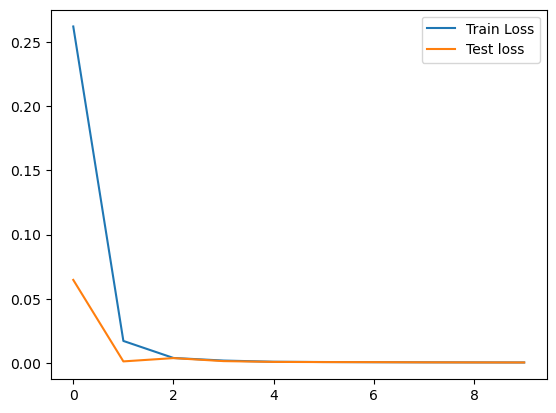

In [31]:
#plot the train losses and test losses
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test loss')
plt.legend()
plt.show()

In [33]:
#Accuracy
n_correct = 0
n_total = 0
for inputs, targets in test_loader2:
    inputs, targets = inputs.to(device) , targets.to(device)
    #forward pass
    outputs = model(inputs)
    #get predictions
    predictions = (outputs>0)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct/n_total
n_correct = 0
n_total = 0
for inputs, targets in test_loader2:
    inputs, targets = inputs.to(device), targets.to(device)
    #forward pass
    outputs = model(inputs)
    #get predictions
    predictions = (outputs>0)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
test_acc = n_correct / n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 1.0000, Test acc: 1.0000
